In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [2]:
pd.set_option('display.max_columns', None)

features = pd.read_csv("rating_features.csv")

In [3]:
features.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,t,f,1.0,f,22.542900,114.059600,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,t,f,1.0,f,22.539490,114.043225,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,t,f,2.0,f,22.508573,114.079426,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,t,f,2.0,f,22.508697,114.079035,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,t,f,301.0,f,22.509502,114.055590,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt


In [4]:
features['room_type'].value_counts()

Entire home/apt    4059
Private room       1652
Shared room         123
Name: room_type, dtype: int64

In [5]:
#columns

features.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'guests_included', 'has_availability',
       'host_is_superhost', 'host_listings_count', 'instant_bookable',
       'latitude(North)', 'longitude(East)', 'maximum_nights',
       'number_of_reviews', 'property_type', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type'],
      dtype='object')

In [6]:
# checking shape of the features

features.shape

(5834, 25)

Here we have 25 columns and 5834 rows

In [7]:
#checking datatype

features.dtypes

accommodates                        int64
amenities                          object
availability_30                     int64
bathrooms                         float64
bed_type                           object
bedrooms                          float64
beds                              float64
calculated_host_listings_count      int64
cancellation_policy                object
guests_included                     int64
has_availability                   object
host_is_superhost                  object
host_listings_count               float64
instant_bookable                   object
latitude(North)                   float64
longitude(East)                   float64
maximum_nights                      int64
number_of_reviews                   int64
property_type                      object
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_rating              float64
review_scores_value               

Here we have 8 categorical features

In [8]:
#checking the target data

target = pd.read_csv("rental_price.csv")

In [9]:
target.head()

,price
0,$300.00
1,$99.00
2,$100.00
3,$100.00
4,$599.00


In [10]:
target.shape

(5834, 1)

In [11]:
target.dtypes

price    object
dtype: object

Steps to Perform :



 Preprocessing the data
 
1. Combine both target data and feature data to create a single dataset
2. Split data into training set and test set
3. Working on training set first
4. Convert all categorical feature into numerical


# Preprocessing the data

In [12]:
#combining target data and feature data to create single dataset

data = pd.concat([features, target], join = 'outer', axis = 1)

In [13]:
data.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,t,f,1.0,f,22.542900,114.059600,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,t,f,1.0,f,22.539490,114.043225,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,t,f,2.0,f,22.508573,114.079426,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,t,f,2.0,f,22.508697,114.079035,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,t,f,301.0,f,22.509502,114.055590,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,$599.00


In [14]:
data.shape

(5834, 26)

In [15]:
#splitting data into training and testing set

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.10, random_state = 42)

In [16]:
train_data.shape

(5250, 26)

In [17]:
test_data.shape

(584, 26)

In [18]:
train_data['bed_type'].value_counts()

Real Bed         5067
Airbed             73
Futon              65
Couch              24
Pull-out Sofa      21
Name: bed_type, dtype: int64

Now we will be working with training data and keeping test data aside

In [19]:
#checking the categorical features

train_data.dtypes

accommodates                        int64
amenities                          object
availability_30                     int64
bathrooms                         float64
bed_type                           object
bedrooms                          float64
beds                              float64
calculated_host_listings_count      int64
cancellation_policy                object
guests_included                     int64
has_availability                   object
host_is_superhost                  object
host_listings_count               float64
instant_bookable                   object
latitude(North)                   float64
longitude(East)                   float64
maximum_nights                      int64
number_of_reviews                   int64
property_type                      object
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_rating              float64
review_scores_value               

In [20]:
#checking null values

train_data.isnull().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                           39
bed_type                             0
bedrooms                             6
beds                                17
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   14
host_listings_count                 14
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             1845
review_scores_communication       1846
review_scores_location            1845
review_scores_rating              1836
review_scores_value               1846
room_type                            0
price                    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd90647adc0>,
      dtype=object)

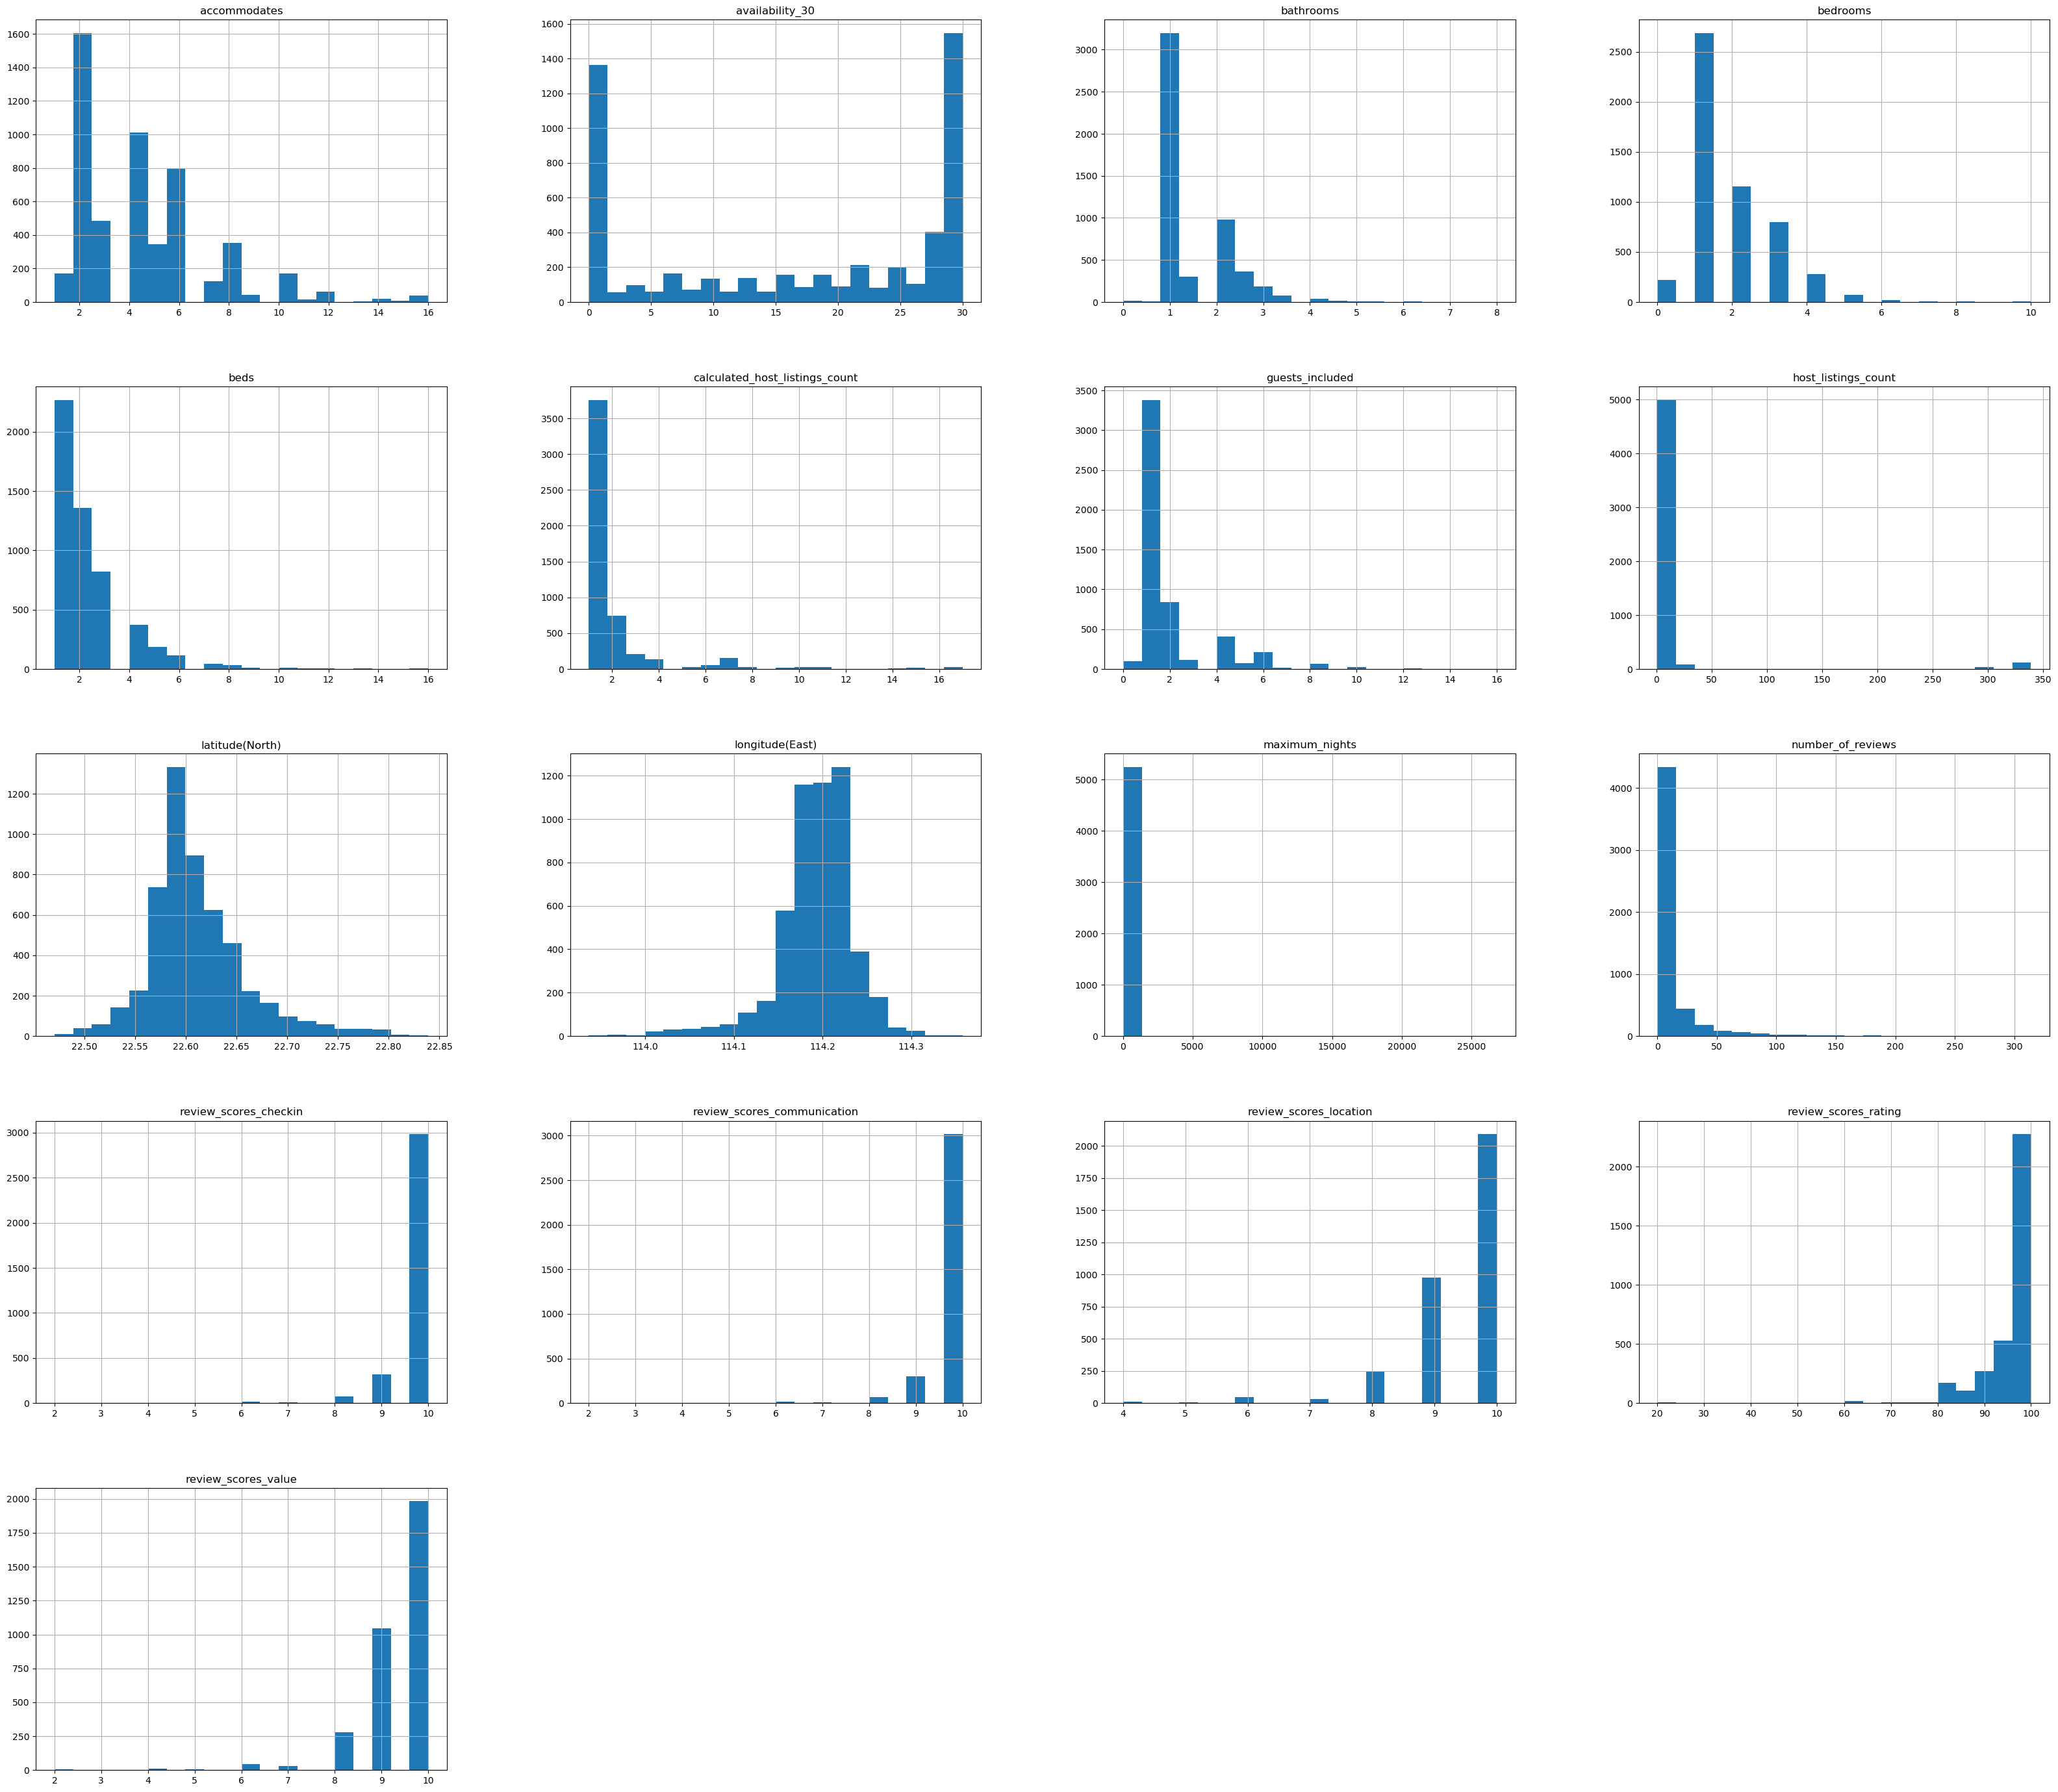

In [21]:
import seaborn as sns

train_data.hist(bins = 20, figsize=(40,35))

In [22]:
#dealing with null values


#bathrooms

train_data['bathrooms'] = train_data['bathrooms'].fillna(int(train_data['bathrooms'].median()))

#bedrooms

train_data['bedrooms'] = train_data['bedrooms'].fillna(int(train_data['bedrooms'].median()))

#beds

train_data['beds'] = train_data['beds'].fillna(int(train_data['beds'].median()))

#host_is_super_host

train_data['host_is_superhost'] = train_data['host_is_superhost'].fillna('none')

#host_listing_counts

train_data['host_listings_count'] = train_data['host_listings_count'].fillna(0)

#review_scores_checkin      

train_data['review_scores_checkin'] = train_data['review_scores_checkin'].fillna(int(train_data['review_scores_checkin'].median()))

#review_scores_communication

train_data['review_scores_communication'] = train_data['review_scores_communication'].fillna(int(train_data['review_scores_communication'].median()))

#review_scores_location  

train_data['review_scores_location'] = train_data['review_scores_location'].fillna(int(train_data['review_scores_location'].median()))

#review_scores_rating 

train_data['review_scores_rating'] = train_data['review_scores_rating'].fillna(int(train_data['review_scores_rating'].median()))


#review_scores_value  

train_data['review_scores_value'] = train_data['review_scores_value'].fillna(int(train_data['review_scores_value'].median()))


/tmp/ipykernel_217308/3466872275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['bathrooms'] = train_data['bathrooms'].fillna(int(train_data['bathrooms'].median()))
/tmp/ipykernel_217308/3466872275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['bedrooms'] = train_data['bedrooms'].fillna(int(train_data['bedrooms'].median()))
/tmp/ipykernel_217308/3466872275.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [23]:
train_data.isnull().sum()

accommodates                      0
amenities                         0
availability_30                   0
bathrooms                         0
bed_type                          0
bedrooms                          0
beds                              0
calculated_host_listings_count    0
cancellation_policy               0
guests_included                   0
has_availability                  0
host_is_superhost                 0
host_listings_count               0
instant_bookable                  0
latitude(North)                   0
longitude(East)                   0
maximum_nights                    0
number_of_reviews                 0
property_type                     0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_rating              0
review_scores_value               0
room_type                         0
price                             0
dtype: int64

In [24]:
# displaying amenities data
train_data_main = train_data

train_data_main['amenities'].head()

5690    {TV,Internet,"Wireless Internet","Air Conditio...
787     {"Air Conditioning",Pool,Kitchen,"Free Parking...
2067    {TV,Internet,"Wireless Internet","Air Conditio...
3339    {Internet,"Wireless Internet","Air Conditionin...
2135    {TV,Internet,"Wireless Internet","Air Conditio...
Name: amenities, dtype: object

In [25]:
#checking for null values

train_data_main['amenities'].isnull().sum()

0

In [26]:
x = train_data_main['amenities'].str.replace('{','').str.replace('}','').str.replace('"','').str.split(',')
x

5690    [TV, Internet, Wireless Internet, Air Conditio...
787     [Air Conditioning, Pool, Kitchen, Free Parking...
2067    [TV, Internet, Wireless Internet, Air Conditio...
3339    [Internet, Wireless Internet, Air Conditioning...
2135    [TV, Internet, Wireless Internet, Air Conditio...
                              ...                        
3772    [TV, Internet, Wireless Internet, Air Conditio...
5191    [TV, Cable TV, Internet, Wireless Internet, Ai...
5226    [TV, Cable TV, Internet, Wireless Internet, Ai...
5390    [TV, Cable TV, Internet, Wireless Internet, Ai...
860     [TV, Air Conditioning, Pool, Kitchen, Free Par...
Name: amenities, Length: 5250, dtype: object

In [27]:
def preprocess():
    def extract_feature(x):
        s1 = x.replace('{','').replace('}','').replace('"','').split(',')
        for s in s1:
            features.add(s)
    features = set()
    train_data_main['amenities'].apply(extract_feature)
    print(features)
    
    #removing extra feature
    features.remove('')
    
    #converting features into columns
    for keys in features:
        train_data_main['Amenities_'+keys.replace(' ','_')] = train_data_main['amenities'].str.contains(keys).astype('int64')

In [28]:
preprocess()

{'', 'Hangers', 'Kitchen', 'First Aid Kit', 'Essentials', 'Elevator in Building', 'Dog(s)', 'Safety Card', 'Indoor Fireplace', 'Dryer', 'Other pet(s)', 'Lock on Bedroom Door', 'Heating', 'Gym', 'Internet', 'Wheelchair Accessible', 'Laptop Friendly Workspace', 'Cable TV', 'Pets Allowed', 'Buzzer/Wireless Intercom', 'Pool', 'Wireless Internet', 'Shampoo', 'Fire Extinguisher', 'Free Parking on Premises', 'TV', 'Smoking Allowed', 'Washer / Dryer', 'Pets live on this property', '24-Hour Check-in', 'Air Conditioning', 'Hair Dryer', 'Washer', 'Iron', 'Hot Tub', 'Breakfast', 'Smoke Detector', 'Carbon Monoxide Detector', 'Cat(s)', 'Suitable for Events', 'Family/Kid Friendly', 'Doorman'}


/tmp/ipykernel_217308/3042985476.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_main['Amenities_'+keys.replace(' ','_')] = train_data_main['amenities'].str.contains(keys).astype('int64')
/usr/lib/python3/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [29]:
train_data_main.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price,Amenities_Hangers,Amenities_Kitchen,Amenities_First_Aid_Kit,Amenities_Essentials,Amenities_Elevator_in_Building,Amenities_Dog(s),Amenities_Safety_Card,Amenities_Indoor_Fireplace,Amenities_Dryer,Amenities_Other_pet(s),Amenities_Lock_on_Bedroom_Door,Amenities_Heating,Amenities_Gym,Amenities_Internet,Amenities_Wheelchair_Accessible,Amenities_Laptop_Friendly_Workspace,Amenities_Cable_TV,Amenities_Pets_Allowed,Amenities_Buzzer/Wireless_Intercom,Amenities_Pool,Amenities_Wireless_Internet,Amenities_Shampoo,Amenities_Fire_Extinguisher,Amenities_Free_Parking_on_Premises,Amenities_TV,Amenities_Smoking_Allowed,Amenities_Washer_/_Dryer,Amenities_Pets_live_on_this_property,Amenities_24-Hour_Check-in,Amenities_Air_Conditioning,Amenities_Hair_Dryer,Amenities_Washer,Amenities_Iron,Amenities_Hot_Tub,Amenities_Breakfast,Amenities_Smoke_Detector,Amenities_Carbon_Monoxide_Detector,Amenities_Cat(s),Amenities_Suitable_for_Events,Amenities_Family/Kid_Friendly,Amenities_Doorman
5690,5,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,2.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.598703,114.203903,1125,0,Condominium,10.0,10.0,10.0,98.0,10.0,Entire home/apt,$750.00,0,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0
787,4,"{""Air Conditioning"",Pool,Kitchen,""Free Parking...",0,1.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.572745,114.213540,1125,1,Apartment,10.0,10.0,10.0,100.0,10.0,Entire home/apt,$175.00,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
2067,7,"{TV,Internet,""Wireless Internet"",""Air Conditio...",4,2.0,Real Bed,3.0,3.0,1,moderate,1,t,f,1.0,t,22.619187,114.234312,1125,8,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,$175.00,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0
3339,10,"{Internet,""Wireless Internet"",""Air Conditionin...",0,2.0,Real Bed,4.0,5.0,1,strict,1,t,f,1.0,f,22.597212,114.187006,1125,21,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,$620.00,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0
2135,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",11,1.0,Real Bed,1.0,1.0,1,moderate,2,t,f,1.0,f,22.606683,114.222916,35,111,House,10.0,10.0,9.0,94.0,10.0,Private room,$50.00,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0


In [30]:
#droping amenities columns because it is of no use

train_data_main = train_data_main.drop('amenities', axis = 1)

In [31]:
train_data_main.head()

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price,Amenities_Hangers,Amenities_Kitchen,Amenities_First_Aid_Kit,Amenities_Essentials,Amenities_Elevator_in_Building,Amenities_Dog(s),Amenities_Safety_Card,Amenities_Indoor_Fireplace,Amenities_Dryer,Amenities_Other_pet(s),Amenities_Lock_on_Bedroom_Door,Amenities_Heating,Amenities_Gym,Amenities_Internet,Amenities_Wheelchair_Accessible,Amenities_Laptop_Friendly_Workspace,Amenities_Cable_TV,Amenities_Pets_Allowed,Amenities_Buzzer/Wireless_Intercom,Amenities_Pool,Amenities_Wireless_Internet,Amenities_Shampoo,Amenities_Fire_Extinguisher,Amenities_Free_Parking_on_Premises,Amenities_TV,Amenities_Smoking_Allowed,Amenities_Washer_/_Dryer,Amenities_Pets_live_on_this_property,Amenities_24-Hour_Check-in,Amenities_Air_Conditioning,Amenities_Hair_Dryer,Amenities_Washer,Amenities_Iron,Amenities_Hot_Tub,Amenities_Breakfast,Amenities_Smoke_Detector,Amenities_Carbon_Monoxide_Detector,Amenities_Cat(s),Amenities_Suitable_for_Events,Amenities_Family/Kid_Friendly,Amenities_Doorman
5690,5,16,2.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.598703,114.203903,1125,0,Condominium,10.0,10.0,10.0,98.0,10.0,Entire home/apt,$750.00,0,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0
787,4,0,1.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.572745,114.213540,1125,1,Apartment,10.0,10.0,10.0,100.0,10.0,Entire home/apt,$175.00,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
2067,7,4,2.0,Real Bed,3.0,3.0,1,moderate,1,t,f,1.0,t,22.619187,114.234312,1125,8,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,$175.00,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0
3339,10,0,2.0,Real Bed,4.0,5.0,1,strict,1,t,f,1.0,f,22.597212,114.187006,1125,21,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,$620.00,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0
2135,2,11,1.0,Real Bed,1.0,1.0,1,moderate,2,t,f,1.0,f,22.606683,114.222916,35,111,House,10.0,10.0,9.0,94.0,10.0,Private room,$50.00,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0


In [32]:
#converting price column into numerical

train_data_main['price'].head()

5690    $750.00
787     $175.00
2067    $175.00
3339    $620.00
2135     $50.00
Name: price, dtype: object

In [33]:
train_data_main['price'] = train_data_main['price'].apply(lambda x: x.replace('$','').replace(',',''))
train_data_main['price'].head()

5690    750.00
787     175.00
2067    175.00
3339    620.00
2135     50.00
Name: price, dtype: object

In [34]:
train_data_main['price']  = train_data_main['price'].astype('float')

/tmp/ipykernel_217308/2190147562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = train_data_main['price'])


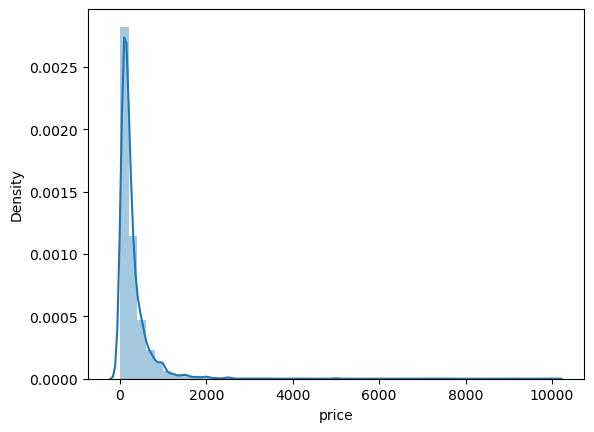

In [35]:
sns.distplot(a = train_data_main['price'])

In [36]:
#remove price = 0

train_data_main = train_data_main.drop(train_data_main[train_data_main['price']==0].index, axis=0)
train_data.shape

(5250, 67)

In [37]:
#converting categorical features into numerical

#displaying categorical features
data_train = train_data_main
data_train.dtypes

accommodates                            int64
availability_30                         int64
bathrooms                             float64
bed_type                               object
bedrooms                              float64
                                       ...   
Amenities_Carbon_Monoxide_Detector      int64
Amenities_Cat(s)                        int64
Amenities_Suitable_for_Events           int64
Amenities_Family/Kid_Friendly           int64
Amenities_Doorman                       int64
Length: 66, dtype: object

In [38]:
data_train['bed_type'].value_counts()

Real Bed         5066
Airbed             73
Futon              65
Couch              24
Pull-out Sofa      21
Name: bed_type, dtype: int64

In [39]:
#using OneHotEncoding
columns = ['bed_type','cancellation_policy','property_type','room_type','has_availability','host_is_superhost','instant_bookable']

for col in columns:
    Encoder = LabelEncoder()
    Encoded_data = Encoder.fit_transform(data_train[col])
    data_train['Encoded_' + col] = Encoded_data.reshape(-1,1)
    


In [40]:
Data_train = Encoded_data

In [41]:
data_train.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'calculated_host_listings_count', 'cancellation_policy',
       'guests_included', 'has_availability', 'host_is_superhost',
       'host_listings_count', 'instant_bookable', 'latitude(North)',
       'longitude(East)', 'maximum_nights', 'number_of_reviews',
       'property_type', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'room_type', 'price', 'Amenities_Hangers', 'Amenities_Kitchen',
       'Amenities_First_Aid_Kit', 'Amenities_Essentials',
       'Amenities_Elevator_in_Building', 'Amenities_Dog(s)',
       'Amenities_Safety_Card', 'Amenities_Indoor_Fireplace',
       'Amenities_Dryer', 'Amenities_Other_pet(s)',
       'Amenities_Lock_on_Bedroom_Door', 'Amenities_Heating', 'Amenities_Gym',
       'Amenities_Internet', 'Amenities_Wheelchair_Accessible',
       'Amenities_Laptop_Friendly_Workspa

In [42]:
data_train.head()

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price,Amenities_Hangers,Amenities_Kitchen,Amenities_First_Aid_Kit,Amenities_Essentials,Amenities_Elevator_in_Building,Amenities_Dog(s),Amenities_Safety_Card,Amenities_Indoor_Fireplace,Amenities_Dryer,Amenities_Other_pet(s),Amenities_Lock_on_Bedroom_Door,Amenities_Heating,Amenities_Gym,Amenities_Internet,Amenities_Wheelchair_Accessible,Amenities_Laptop_Friendly_Workspace,Amenities_Cable_TV,Amenities_Pets_Allowed,Amenities_Buzzer/Wireless_Intercom,Amenities_Pool,Amenities_Wireless_Internet,Amenities_Shampoo,Amenities_Fire_Extinguisher,Amenities_Free_Parking_on_Premises,Amenities_TV,Amenities_Smoking_Allowed,Amenities_Washer_/_Dryer,Amenities_Pets_live_on_this_property,Amenities_24-Hour_Check-in,Amenities_Air_Conditioning,Amenities_Hair_Dryer,Amenities_Washer,Amenities_Iron,Amenities_Hot_Tub,Amenities_Breakfast,Amenities_Smoke_Detector,Amenities_Carbon_Monoxide_Detector,Amenities_Cat(s),Amenities_Suitable_for_Events,Amenities_Family/Kid_Friendly,Amenities_Doorman,Encoded_bed_type,Encoded_cancellation_policy,Encoded_property_type,Encoded_room_type,Encoded_has_availability,Encoded_host_is_superhost,Encoded_instant_bookable
5690,5,16,2.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.598703,114.203903,1125,0,Condominium,10.0,10.0,10.0,98.0,10.0,Entire home/apt,750.0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,4,0,7,0,0,0,0
787,4,0,1.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.572745,114.213540,1125,1,Apartment,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175.0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,4,0,0,0,0,0,0
2067,7,4,2.0,Real Bed,3.0,3.0,1,moderate,1,t,f,1.0,t,22.619187,114.234312,1125,8,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175.0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,4,1,9,0,0,0,1
3339,10,0,2.0,Real Bed,4.0,5.0,1,strict,1,t,f,1.0,f,22.597212,114.187006,1125,21,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,620.0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,4,3,9,0,0,0,0
2135,2,11,1.0,Real Bed,1.0,1.0,1,moderate,2,t,f,1.0,f,22.606683,114.222916,35,111,House,10.0,10.0,9.0,94.0,10.0,Private room,50.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,4,1,9,1,0,0,0


In [43]:
data_train['Encoded_availability'] = data_train['has_availability'].apply(lambda x: x.replace('t','1'))

In [44]:
#droppinf columns with no values in it

data_train = data_train.drop(['Amenities_Dog(s)','Amenities_Cat(s)','Encoded_has_availability','Amenities_Other_pet(s)'], axis = 1)

In [45]:
data_train.shape

(5249, 70)

In [46]:
data_train.head()

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price,Amenities_Hangers,Amenities_Kitchen,Amenities_First_Aid_Kit,Amenities_Essentials,Amenities_Elevator_in_Building,Amenities_Safety_Card,Amenities_Indoor_Fireplace,Amenities_Dryer,Amenities_Lock_on_Bedroom_Door,Amenities_Heating,Amenities_Gym,Amenities_Internet,Amenities_Wheelchair_Accessible,Amenities_Laptop_Friendly_Workspace,Amenities_Cable_TV,Amenities_Pets_Allowed,Amenities_Buzzer/Wireless_Intercom,Amenities_Pool,Amenities_Wireless_Internet,Amenities_Shampoo,Amenities_Fire_Extinguisher,Amenities_Free_Parking_on_Premises,Amenities_TV,Amenities_Smoking_Allowed,Amenities_Washer_/_Dryer,Amenities_Pets_live_on_this_property,Amenities_24-Hour_Check-in,Amenities_Air_Conditioning,Amenities_Hair_Dryer,Amenities_Washer,Amenities_Iron,Amenities_Hot_Tub,Amenities_Breakfast,Amenities_Smoke_Detector,Amenities_Carbon_Monoxide_Detector,Amenities_Suitable_for_Events,Amenities_Family/Kid_Friendly,Amenities_Doorman,Encoded_bed_type,Encoded_cancellation_policy,Encoded_property_type,Encoded_room_type,Encoded_host_is_superhost,Encoded_instant_bookable,Encoded_availability
5690,5,16,2.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.598703,114.203903,1125,0,Condominium,10.0,10.0,10.0,98.0,10.0,Entire home/apt,750.0,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,4,0,7,0,0,0,1
787,4,0,1.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.572745,114.213540,1125,1,Apartment,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175.0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,4,0,0,0,0,0,1
2067,7,4,2.0,Real Bed,3.0,3.0,1,moderate,1,t,f,1.0,t,22.619187,114.234312,1125,8,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175.0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,4,1,9,0,0,1,1
3339,10,0,2.0,Real Bed,4.0,5.0,1,strict,1,t,f,1.0,f,22.597212,114.187006,1125,21,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,620.0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,4,3,9,0,0,0,1
2135,2,11,1.0,Real Bed,1.0,1.0,1,moderate,2,t,f,1.0,f,22.606683,114.222916,35,111,House,10.0,10.0,9.0,94.0,10.0,Private room,50.0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,4,1,9,1,0,0,1


# Feature Selection

In [47]:
data_train.head()

,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,has_availability,host_is_superhost,host_listings_count,instant_bookable,latitude(North),longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price,Amenities_Hangers,Amenities_Kitchen,Amenities_First_Aid_Kit,Amenities_Essentials,Amenities_Elevator_in_Building,Amenities_Safety_Card,Amenities_Indoor_Fireplace,Amenities_Dryer,Amenities_Lock_on_Bedroom_Door,Amenities_Heating,Amenities_Gym,Amenities_Internet,Amenities_Wheelchair_Accessible,Amenities_Laptop_Friendly_Workspace,Amenities_Cable_TV,Amenities_Pets_Allowed,Amenities_Buzzer/Wireless_Intercom,Amenities_Pool,Amenities_Wireless_Internet,Amenities_Shampoo,Amenities_Fire_Extinguisher,Amenities_Free_Parking_on_Premises,Amenities_TV,Amenities_Smoking_Allowed,Amenities_Washer_/_Dryer,Amenities_Pets_live_on_this_property,Amenities_24-Hour_Check-in,Amenities_Air_Conditioning,Amenities_Hair_Dryer,Amenities_Washer,Amenities_Iron,Amenities_Hot_Tub,Amenities_Breakfast,Amenities_Smoke_Detector,Amenities_Carbon_Monoxide_Detector,Amenities_Suitable_for_Events,Amenities_Family/Kid_Friendly,Amenities_Doorman,Encoded_bed_type,Encoded_cancellation_policy,Encoded_property_type,Encoded_room_type,Encoded_host_is_superhost,Encoded_instant_bookable,Encoded_availability
5690,5,16,2.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.598703,114.203903,1125,0,Condominium,10.0,10.0,10.0,98.0,10.0,Entire home/apt,750.0,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,4,0,7,0,0,0,1
787,4,0,1.0,Real Bed,2.0,2.0,1,flexible,1,t,f,1.0,f,22.572745,114.213540,1125,1,Apartment,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175.0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,4,0,0,0,0,0,1
2067,7,4,2.0,Real Bed,3.0,3.0,1,moderate,1,t,f,1.0,t,22.619187,114.234312,1125,8,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,175.0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,4,1,9,0,0,1,1
3339,10,0,2.0,Real Bed,4.0,5.0,1,strict,1,t,f,1.0,f,22.597212,114.187006,1125,21,House,10.0,10.0,10.0,100.0,10.0,Entire home/apt,620.0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,4,3,9,0,0,0,1
2135,2,11,1.0,Real Bed,1.0,1.0,1,moderate,2,t,f,1.0,f,22.606683,114.222916,35,111,House,10.0,10.0,9.0,94.0,10.0,Private room,50.0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,4,1,9,1,0,0,1


In [48]:
data_train.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'calculated_host_listings_count', 'cancellation_policy',
       'guests_included', 'has_availability', 'host_is_superhost',
       'host_listings_count', 'instant_bookable', 'latitude(North)',
       'longitude(East)', 'maximum_nights', 'number_of_reviews',
       'property_type', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'room_type', 'price', 'Amenities_Hangers', 'Amenities_Kitchen',
       'Amenities_First_Aid_Kit', 'Amenities_Essentials',
       'Amenities_Elevator_in_Building', 'Amenities_Safety_Card',
       'Amenities_Indoor_Fireplace', 'Amenities_Dryer',
       'Amenities_Lock_on_Bedroom_Door', 'Amenities_Heating', 'Amenities_Gym',
       'Amenities_Internet', 'Amenities_Wheelchair_Accessible',
       'Amenities_Laptop_Friendly_Workspace', 'Amenities_Cable_TV',
       'Amenities_Pets_All

In [49]:
x = data_train.loc[:, ['accommodates', 'availability_30', 'bathrooms', 'bedrooms',
       'beds', 'calculated_host_listings_count',
       'guests_included',
       'host_listings_count','latitude(North)',
       'longitude(East)', 'maximum_nights', 'number_of_reviews',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'Amenities_Suitable_for_Events',
       'Amenities_Family/Kid_Friendly', 'Amenities_Pets_Allowed',
       'Amenities_TV', 'Amenities_24-Hour_Check-in', 'Amenities_Iron',
       'Amenities_First_Aid_Kit', 'Amenities_Fire_Extinguisher',
       'Amenities_Free_Parking_on_Premises', 'Amenities_Air_Conditioning',
       'Amenities_Elevator_in_Building', 'Amenities_Washer',
       'Amenities_Carbon_Monoxide_Detector', 'Amenities_Kitchen',
       'Amenities_Indoor_Fireplace', 'Amenities_Laptop_Friendly_Workspace',
       'Amenities_Pool', 'Amenities_Safety_Card', 'Amenities_Hot_Tub',
       'Amenities_Pets_live_on_this_property', 'Amenities_Hangers',
       'Amenities_Heating', 'Amenities_Washer_/_Dryer',
       'Amenities_Wireless_Internet', 'Amenities_Lock_on_Bedroom_Door',
       'Amenities_Smoking_Allowed', 'Amenities_Gym', 'Amenities_Hair_Dryer',
       'Amenities_Buzzer/Wireless_Intercom', 'Amenities_Internet',
       'Amenities_Doorman', 'Amenities_Cable_TV', 'Amenities_Dryer',
       'Amenities_Breakfast', 'Amenities_Essentials',
       'Amenities_Smoke_Detector', 'Amenities_Wheelchair_Accessible',
       'Amenities_Shampoo', 'Encoded_bed_type', 'Encoded_cancellation_policy',
       'Encoded_property_type', 'Encoded_room_type',
       'Encoded_host_is_superhost', 'Encoded_instant_bookable',
       'Encoded_availability']]
x.head()

,accommodates,availability_30,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,host_listings_count,latitude(North),longitude(East),maximum_nights,number_of_reviews,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,Amenities_Suitable_for_Events,Amenities_Family/Kid_Friendly,Amenities_Pets_Allowed,Amenities_TV,Amenities_24-Hour_Check-in,Amenities_Iron,Amenities_First_Aid_Kit,Amenities_Fire_Extinguisher,Amenities_Free_Parking_on_Premises,Amenities_Air_Conditioning,Amenities_Elevator_in_Building,Amenities_Washer,Amenities_Carbon_Monoxide_Detector,Amenities_Kitchen,Amenities_Indoor_Fireplace,Amenities_Laptop_Friendly_Workspace,Amenities_Pool,Amenities_Safety_Card,Amenities_Hot_Tub,Amenities_Pets_live_on_this_property,Amenities_Hangers,Amenities_Heating,Amenities_Washer_/_Dryer,Amenities_Wireless_Internet,Amenities_Lock_on_Bedroom_Door,Amenities_Smoking_Allowed,Amenities_Gym,Amenities_Hair_Dryer,Amenities_Buzzer/Wireless_Intercom,Amenities_Internet,Amenities_Doorman,Amenities_Cable_TV,Amenities_Dryer,Amenities_Breakfast,Amenities_Essentials,Amenities_Smoke_Detector,Amenities_Wheelchair_Accessible,Amenities_Shampoo,Encoded_bed_type,Encoded_cancellation_policy,Encoded_property_type,Encoded_room_type,Encoded_host_is_superhost,Encoded_instant_bookable,Encoded_availability
5690,5,16,2.0,2.0,2.0,1,1,1.0,22.598703,114.203903,1125,0,10.0,10.0,10.0,98.0,10.0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,4,0,7,0,0,0,1
787,4,0,1.0,2.0,2.0,1,1,1.0,22.572745,114.213540,1125,1,10.0,10.0,10.0,100.0,10.0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,4,0,0,0,0,0,1
2067,7,4,2.0,3.0,3.0,1,1,1.0,22.619187,114.234312,1125,8,10.0,10.0,10.0,100.0,10.0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,4,1,9,0,0,1,1
3339,10,0,2.0,4.0,5.0,1,1,1.0,22.597212,114.187006,1125,21,10.0,10.0,10.0,100.0,10.0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,4,3,9,0,0,0,1
2135,2,11,1.0,1.0,1.0,1,2,1.0,22.606683,114.222916,35,111,10.0,10.0,9.0,94.0,10.0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,4,1,9,1,0,0,1


In [50]:
data_train.isnull().sum()

accommodates                 0
availability_30              0
bathrooms                    0
bed_type                     0
bedrooms                     0
                            ..
Encoded_property_type        0
Encoded_room_type            0
Encoded_host_is_superhost    0
Encoded_instant_bookable     0
Encoded_availability         0
Length: 70, dtype: int64

In [51]:
y = data_train.iloc[:,24]
y.head()

5690    750.0
787     175.0
2067    175.0
3339    620.0
2135     50.0
Name: price, dtype: float64

In [52]:
#important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [53]:
selection.feature_importances_

array([5.03539082e-02, 3.47546983e-02, 2.68540023e-01, 1.18812627e-01,
       3.41745219e-02, 8.95509757e-03, 9.59010388e-03, 6.85226894e-03,
       2.55668460e-02, 2.21867281e-02, 1.75975774e-02, 1.90449785e-02,
       2.02012619e-03, 3.09984573e-03, 6.12045848e-03, 6.04372635e-03,
       6.24811200e-03, 3.47505739e-02, 8.00667501e-03, 1.10571099e-02,
       2.29874942e-03, 9.48014356e-04, 8.77159203e-04, 1.00339200e-02,
       8.19389701e-03, 8.77546870e-03, 5.53057388e-03, 4.79557984e-03,
       1.79837288e-03, 1.19829661e-02, 1.55120309e-03, 9.25985952e-03,
       9.35625129e-04, 1.40869370e-02, 5.02943478e-03, 1.26592743e-02,
       1.00242559e-02, 4.10826213e-03, 1.58768095e-03, 1.47932447e-03,
       3.58753925e-03, 3.54375539e-05, 2.81256920e-03, 3.42516414e-03,
       1.23662858e-03, 9.56731066e-03, 2.48299834e-03, 5.94222519e-02,
       8.95826388e-03, 2.23155965e-03, 1.53675631e-02, 7.64118622e-03,
       7.87838134e-03, 1.07198135e-02, 1.17211558e-02, 7.49475447e-04,
      

In [54]:
feat_importances = pd.Series(selection.feature_importances_, index = x.columns)

In [55]:
pd.set_option('display.max_rows', None)

importances = feat_importances.nlargest(20)

In [56]:
importances

bathrooms                             0.268540
bedrooms                              0.118813
Amenities_Doorman                     0.059422
accommodates                          0.050354
availability_30                       0.034755
Amenities_Suitable_for_Events         0.034751
beds                                  0.034175
latitude(North)                       0.025567
longitude(East)                       0.022187
Encoded_room_type                     0.020474
number_of_reviews                     0.019045
maximum_nights                        0.017598
Amenities_Breakfast                   0.015368
Amenities_Pool                        0.014087
Amenities_Hot_Tub                     0.012659
Amenities_Carbon_Monoxide_Detector    0.011983
Encoded_cancellation_policy           0.011836
Amenities_Shampoo                     0.011721
Amenities_Pets_Allowed                0.011057
Amenities_Wheelchair_Accessible       0.010720
dtype: float64

# Building model

In [57]:
data_train.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'calculated_host_listings_count', 'cancellation_policy',
       'guests_included', 'has_availability', 'host_is_superhost',
       'host_listings_count', 'instant_bookable', 'latitude(North)',
       'longitude(East)', 'maximum_nights', 'number_of_reviews',
       'property_type', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'room_type', 'price', 'Amenities_Hangers', 'Amenities_Kitchen',
       'Amenities_First_Aid_Kit', 'Amenities_Essentials',
       'Amenities_Elevator_in_Building', 'Amenities_Safety_Card',
       'Amenities_Indoor_Fireplace', 'Amenities_Dryer',
       'Amenities_Lock_on_Bedroom_Door', 'Amenities_Heating', 'Amenities_Gym',
       'Amenities_Internet', 'Amenities_Wheelchair_Accessible',
       'Amenities_Laptop_Friendly_Workspace', 'Amenities_Cable_TV',
       'Amenities_Pets_All

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

train_x = data_train.drop(['price','has_availability', 'host_is_superhost','instant_bookable','Encoded_bed_type', 'Encoded_cancellation_policy',
       'Encoded_property_type', 'Encoded_room_type',
       'Encoded_host_is_superhost', 'Encoded_instant_bookable',
       'Encoded_availability'], axis = 1)

In [59]:
x_train,x_test, y_train,y_test = train_test_split(train_x, y, test_size = 0.1, random_state = 42)

In [60]:
#OneHotEncoding categorical data

ohe = OneHotEncoder()
ohe.fit(train_x[['bed_type','cancellation_policy','property_type','room_type']])

OneHotEncoder()

In [61]:
regressor = RandomForestRegressor()


In [62]:
#making column_transformer

column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['bed_type','cancellation_policy','property_type','room_type']),remainder = 'passthrough')

In [63]:
#making pipeline 

pipe = make_pipeline(column_trans, regressor)

In [64]:
#fitting data

pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'],
      dtype=object),
                                                                            array(['flexible', 'moderate', 'no_refunds', 'strict', 'super_strict_30'],
      dtype=object),
                                                                            array(['Apartment', 'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin',
       'Camper/RV', 'Chalet', 'Condominium', 'Earth House', 'House',
       'Hut', 'Loft', 'Other', 'Tent', 'Tipi', 'Townhouse', 'Treehouse',
       'Villa'], dtype=object),
                                                                            array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]),
                                                  ['bed_type',
                                                   'cancellation_policy',
                                                   'property_type',
                                                   'room_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [65]:
pred = pipe.predict(x_train)

In [66]:
error_score = sklearn.metrics.r2_score(y_train,pred)
error_score

0.915534089225602

In [67]:
#checking rootmeansquare error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,pred)
rmse = np.sqrt(mse)
rmse

117.37123043735056

In [68]:
mse

13776.005734377648

In [69]:
#checking cross_val_score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [70]:
 def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

In [71]:
display_scores(rmse_scores)

Scores: [456.43334799 382.77023736 256.03903741 231.95788175 251.79605097
 386.92877042 221.87107675 276.7132885  335.51504601 225.81571922]
Mean: 302.5840456366901
Standard deviation: 78.17230017344369


/tmp/ipykernel_217308/146099051.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-pred)


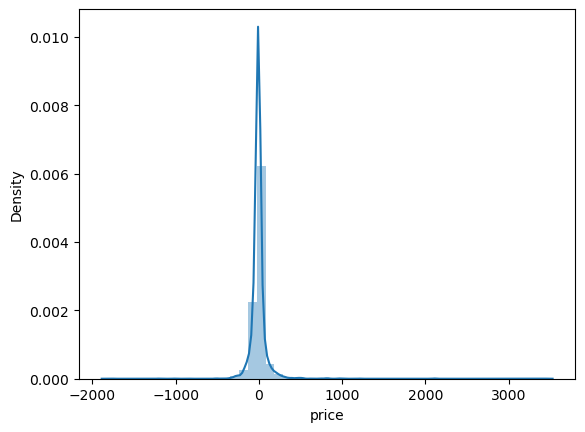

In [72]:
sns.distplot(y_train-pred)
plt.show()

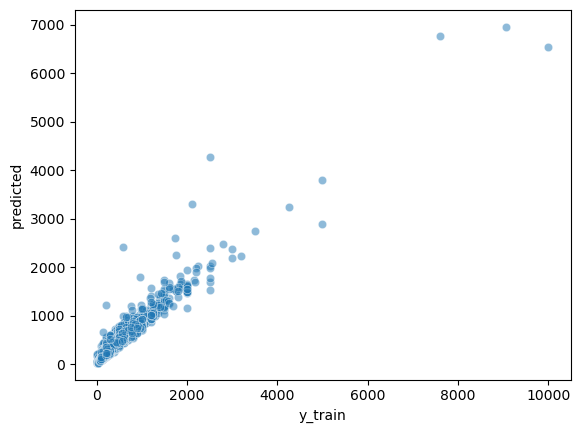

In [73]:
sns.scatterplot(x = y_train, y = pred, alpha = 0.5)
plt.xlabel('y_train')
plt.ylabel('predicted')
plt.show()

# Model Tuning

In [74]:
#removing unwanted features

train_x2 = train_x.loc[:,['bathrooms','bedrooms','Amenities_Doorman','accommodates','beds','availability_30','Amenities_Suitable_for_Events','longitude(East)','latitude(North)',
                      'room_type','maximum_nights','Amenities_Breakfast','number_of_reviews','Amenities_Pool','Amenities_Hot_Tub','Amenities_Wheelchair_Accessible','cancellation_policy',
                       'Amenities_Buzzer/Wireless_Intercom','Amenities_Shampoo','Amenities_Pets_live_on_this_property'
                      ]]

In [75]:
y.head()

5690    750.0
787     175.0
2067    175.0
3339    620.0
2135     50.0
Name: price, dtype: float64

In [76]:
train_x2.head()

,bathrooms,bedrooms,Amenities_Doorman,accommodates,beds,availability_30,Amenities_Suitable_for_Events,longitude(East),latitude(North),room_type,maximum_nights,Amenities_Breakfast,number_of_reviews,Amenities_Pool,Amenities_Hot_Tub,Amenities_Wheelchair_Accessible,cancellation_policy,Amenities_Buzzer/Wireless_Intercom,Amenities_Shampoo,Amenities_Pets_live_on_this_property
5690,2.0,2.0,0,5,2.0,16,0,114.203903,22.598703,Entire home/apt,1125,0,0,1,0,0,flexible,0,0,0
787,1.0,2.0,0,4,2.0,0,0,114.213540,22.572745,Entire home/apt,1125,0,1,1,0,0,flexible,0,0,1
2067,2.0,3.0,0,7,3.0,4,0,114.234312,22.619187,Entire home/apt,1125,1,8,0,0,1,moderate,0,1,0
3339,2.0,4.0,0,10,5.0,0,1,114.187006,22.597212,Entire home/apt,1125,0,21,0,0,0,strict,0,1,1
2135,1.0,1.0,0,2,1.0,11,0,114.222916,22.606683,Private room,35,0,111,0,0,0,moderate,0,1,1


In [77]:
 
new_encoder = OneHotEncoder()
new_encoder.fit(train_x2[['cancellation_policy','room_type']])

OneHotEncoder()

In [78]:
Regressor = RandomForestRegressor()

In [79]:
column_trans2 = make_column_transformer((OneHotEncoder(categories = new_encoder.categories_),['cancellation_policy','room_type']),remainder = 'passthrough')

In [80]:
new_pipe =make_pipeline(column_trans2,Regressor)

In [81]:
new_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['flexible', 'moderate', 'no_refunds', 'strict', 'super_strict_30'],
      dtype=object),
                                                                            array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]),
                                                  ['cancellation_policy',
                                                   'room_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [82]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(train_x2,y, random_state = 42, test_size = 0.2)

In [83]:
x_train2.head()

,bathrooms,bedrooms,Amenities_Doorman,accommodates,beds,availability_30,Amenities_Suitable_for_Events,longitude(East),latitude(North),room_type,maximum_nights,Amenities_Breakfast,number_of_reviews,Amenities_Pool,Amenities_Hot_Tub,Amenities_Wheelchair_Accessible,cancellation_policy,Amenities_Buzzer/Wireless_Intercom,Amenities_Shampoo,Amenities_Pets_live_on_this_property
47,1.0,1.0,0,2,1.0,0,0,114.067264,22.722861,Private room,1125,0,0,1,0,0,flexible,1,1,0
5053,1.0,1.0,0,2,1.0,0,0,114.242571,22.702278,Private room,1125,0,1,0,0,0,flexible,0,1,0
3499,3.0,3.0,0,7,5.0,22,0,114.163315,22.594715,Entire home/apt,1125,0,0,0,0,0,strict,0,0,0
5351,2.5,4.0,0,8,4.0,30,0,114.238730,22.631897,Entire home/apt,14,0,1,1,0,1,strict,0,0,0
3813,2.5,4.0,0,9,5.0,0,1,114.177916,22.567310,Entire home/apt,1125,0,2,0,0,0,flexible,0,1,0


In [84]:
new_pipe.fit(x_train2,y_train2)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['flexible', 'moderate', 'no_refunds', 'strict', 'super_strict_30'],
      dtype=object),
                                                                            array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]),
                                                  ['cancellation_policy',
                                                   'room_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [85]:
new_pred = new_pipe.predict(x_train2)

In [130]:
x_train2.head()

,bathrooms,bedrooms,Amenities_Doorman,accommodates,beds,availability_30,Amenities_Suitable_for_Events,longitude(East),latitude(North),room_type,maximum_nights,Amenities_Breakfast,number_of_reviews,Amenities_Pool,Amenities_Hot_Tub,Amenities_Wheelchair_Accessible,cancellation_policy,Amenities_Buzzer/Wireless_Intercom,Amenities_Shampoo,Amenities_Pets_live_on_this_property
47,1.0,1.0,0,2,1.0,0,0,114.067264,22.722861,Private room,1125,0,0,1,0,0,flexible,1,1,0
5053,1.0,1.0,0,2,1.0,0,0,114.242571,22.702278,Private room,1125,0,1,0,0,0,flexible,0,1,0
3499,3.0,3.0,0,7,5.0,22,0,114.163315,22.594715,Entire home/apt,1125,0,0,0,0,0,strict,0,0,0
5351,2.5,4.0,0,8,4.0,30,0,114.238730,22.631897,Entire home/apt,14,0,1,1,0,1,strict,0,0,0
3813,2.5,4.0,0,9,5.0,0,1,114.177916,22.567310,Entire home/apt,1125,0,2,0,0,0,flexible,0,1,0


In [111]:
new_pred[:10]

array([720.48,  51.01, 618.31, 751.  , 908.45, 262.93, 209.08,  77.24,
       400.29, 543.74])

In [86]:
y_train2[:10]

47      1000.0
5053      45.0
3499     595.0
5351     795.0
3813    1100.0
4957     207.0
1068     250.0
3152      68.0
5342     399.0
3440     550.0
Name: price, dtype: float64

In [123]:
#checking rootmeansquare error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train2,new_pred)
rmse = np.sqrt(mse)
rmse

101.82140751502153

In [124]:
mse

10367.599028340082

In [125]:
#checking r2score
score = sklearn.metrics.r2_score(y_train2,new_pred)

In [126]:
score

0.9230805732790289

In [127]:
y_train2.tail()

2562     90.0
2084    300.0
5486    200.0
1184    225.0
1634    210.0
Name: price, dtype: float64

In [131]:
#predicting values 

new_pipe.predict(pd.DataFrame([[1.0,1.0,0,2,1.0,0,0,114.067264,22.722861,'Private room',1125,0,0,1,0,0,'flexible',1,1,0]], 
                            columns =['bathrooms', 'bedrooms', 'Amenities_Doorman', 'accommodates', 'beds','availability_30', 'Amenities_Suitable_for_Events','longitude(East)','latitude(North)','room_type', 'maximum_nights', 'Amenities_Breakfast','number_of_reviews', 'Amenities_Pool', 'Amenities_Hot_Tub','Amenities_Wheelchair_Accessible', 'cancellation_policy','Amenities_Buzzer/Wireless_Intercom', 'Amenities_Shampoo','Amenities_Pets_live_on_this_property']))

array([720.48])

In [9]:
import joblib
import pandas as pd
model = joblib.load('Price Prediction')

In [11]:
model.predict(pd.DataFrame([[1.0,1.0,0,2,1.0,0,0,114.067264,22.722861,'Private room',1125,0,0,1,0,0,'flexible',1,1,0]], 
                            columns =['bathrooms', 'bedrooms', 'Amenities_Doorman', 'accommodates', 'beds','availability_30', 'Amenities_Suitable_for_Events','longitude(East)','latitude(North)','room_type', 'maximum_nights', 'Amenities_Breakfast','number_of_reviews', 'Amenities_Pool', 'Amenities_Hot_Tub','Amenities_Wheelchair_Accessible', 'cancellation_policy','Amenities_Buzzer/Wireless_Intercom', 'Amenities_Shampoo','Amenities_Pets_live_on_this_property']))

array([644.29])